In [1]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy

# My Tools
from toolkit.tools import print_column_uniques, make_df, get_column_uniques


%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [12, 7]

In [3]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [4]:
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [5]:
# COLORS
# ============================
# Light
color_hombres_light = "#8ecae6"
color_mujeres_light = "#ffafcc"
color_neutro_light = "#d4a373"
# Dark
color_hombres_dark = "#023047"
color_mujeres_dark = "#ff006e"
color_neutro_dark = "#ffb703"

In [6]:
from IPython.core.display import HTML as Center

Center(
    """ <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """
)

In [7]:
# Light
color_hombres_light = (12 / 255, 50 / 255, 196 / 255, 0.5)
color_mujeres_light = (255 / 255, 192 / 255, 203 / 255, 0.5)
color_neutro_light = (149 / 255, 165 / 255, 166 / 255, 0.5)
# Dark
color_hombres_dark = (12 / 255, 50 / 255, 196 / 255, 0.8)
color_mujeres_dark = (255 / 255, 192 / 255, 203 / 255, 0.8)
color_neutro_dark = (149 / 255, 165 / 255, 166 / 255, 0.8)

# EXPERIENCIA

    - Sobre la 'experiencia' de las personas que respondieron la encuesta.

## GENERAL 

In [8]:
df["exp_en_IT"].value_counts()

5-9      124
<5        94
10-14     82
15-19     20
20-24      9
25-29      5
30-34      4
35-39      2
>50        1
45-49      1
Name: exp_en_IT, dtype: int64

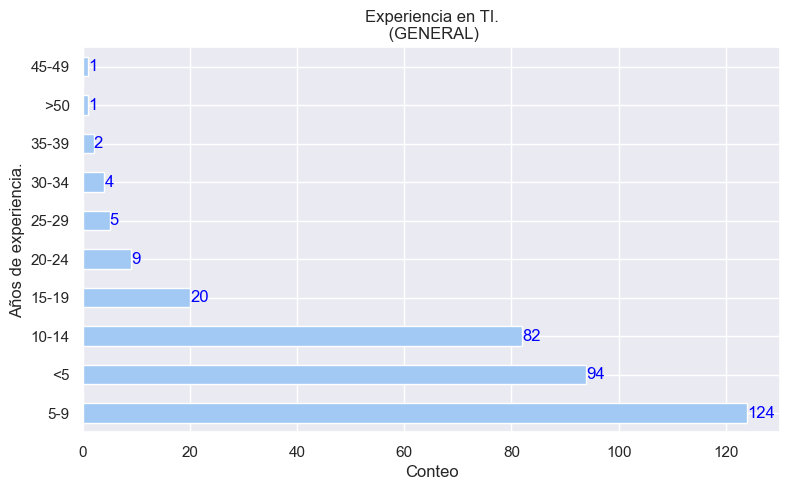

In [13]:
fig = plt.figure(figsize=(9, 5))


exp_ti = (
    df["exp_en_IT"]
    .value_counts()
    .plot(
        kind="barh", 
        title="Experiencia en TI.\n (GENERAL)",
        ylabel= 'Años de experiencia.',
        xlabel='Conteo'
    )
)

for k, v in enumerate(df["exp_en_IT"].value_counts().values):
    exp_ti.annotate(v, (v, k), va="center", color="blue")

plt.show()

## Experiencia en TI. POR GENERO

In [14]:
gen = df.groupby("genero")

### EXPERIENCIA EN TI - HOMBRES

In [15]:
gen.get_group("HOMBRE")["exp_en_IT"].value_counts()

5-9      98
<5       75
10-14    71
15-19    15
20-24     9
25-29     5
30-34     4
35-39     1
>50       1
Name: exp_en_IT, dtype: int64

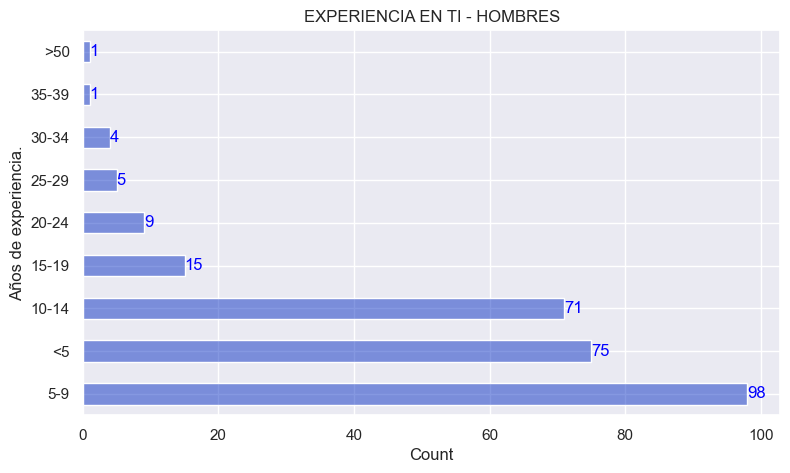

In [21]:
fig = plt.figure(figsize=(9, 5))

homb_exp_ti = (
    gen.get_group("HOMBRE")["exp_en_IT"]
    .value_counts()
    .plot(kind="barh", title="EXPERIENCIA EN TI - HOMBRES", color=color_hombres_light,
         ylabel='Años de experiencia.' , xlabel='Count')
)


for k, v in enumerate(gen.get_group("HOMBRE")["exp_en_IT"].value_counts().values):
    homb_exp_ti.annotate(v, (v, k), va="center", color="blue")

plt.show()

### EXPERIENCIA DE TI - MUJERES

In [22]:
gen.get_group("MUJER")["exp_en_IT"].value_counts()

5-9      23
<5       14
10-14     7
15-19     4
35-39     1
Name: exp_en_IT, dtype: int64

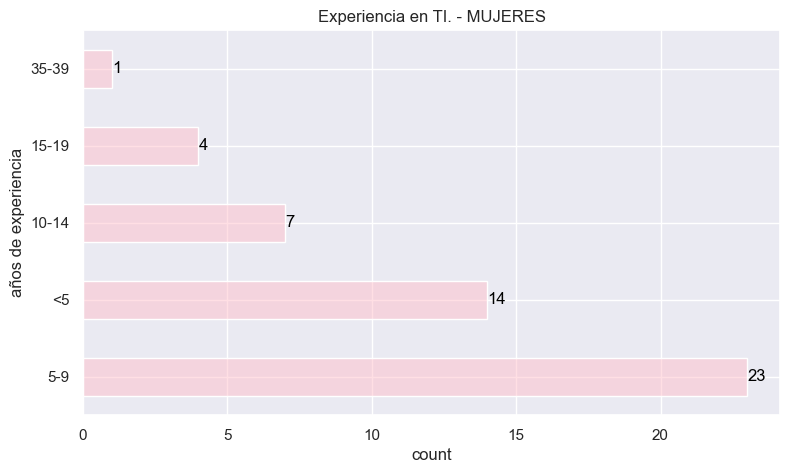

In [26]:
fig = plt.figure(figsize=(9, 5))

exp_ti_mujer = (
    gen.get_group("MUJER")["exp_en_IT"]
    .value_counts()
    .plot(kind="barh", title="Experiencia en TI. - MUJERES", color=color_mujeres_light,
         ylabel='años de experiencia',
         xlabel='count')
)


for k, v in enumerate(gen.get_group("MUJER")["exp_en_IT"].value_counts().values):
    exp_ti_mujer.annotate(v, (v, k), va="center", color="black")

plt.show()

### Experiencia en TI. - NO DEFINIDO

In [27]:
gen.get_group("NO COMPARTO")["exp_en_IT"].value_counts()

<5       2
10-14    2
5-9      1
45-49    1
Name: exp_en_IT, dtype: int64

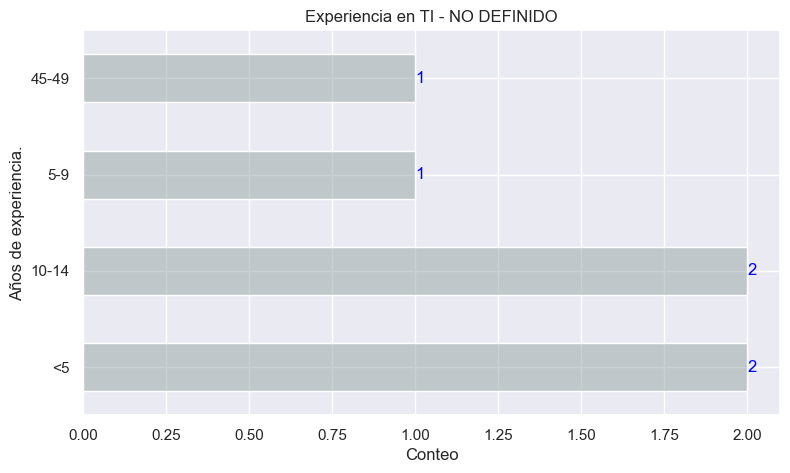

In [29]:
fig = plt.figure(figsize=(9, 5))


exp_ti_no_comp = (
    gen.get_group("NO COMPARTO")["exp_en_IT"]
    .value_counts()
    .plot(
        kind="barh", title="Experiencia en TI - NO DEFINIDO", color=color_neutro_light,
        ylabel='Años de experiencia.',
        xlabel='Conteo'
    )
)


for k, v in enumerate(gen.get_group("NO COMPARTO")["exp_en_IT"].value_counts().values):
    exp_ti_no_comp.annotate(v, (v, k), va="center", color="blue")

plt.show()

In [30]:
gen_exp_groups = df.groupby(["genero", "exp_en_IT"])

In [31]:
gen_exp_groups.groups.keys()

dict_keys([('HOMBRE', '10-14'), ('HOMBRE', '15-19'), ('HOMBRE', '20-24'), ('HOMBRE', '25-29'), ('HOMBRE', '30-34'), ('HOMBRE', '35-39'), ('HOMBRE', '5-9'), ('HOMBRE', '<5'), ('HOMBRE', '>50'), ('MUJER', '10-14'), ('MUJER', '15-19'), ('MUJER', '35-39'), ('MUJER', '5-9'), ('MUJER', '<5'), ('NO COMPARTO', '10-14'), ('NO COMPARTO', '45-49'), ('NO COMPARTO', '5-9'), ('NO COMPARTO', '<5'), (nan, '10-14'), (nan, '15-19'), (nan, '5-9'), (nan, '<5')])

In [101]:
len(gen_exp_groups.groups.keys())

22

# Experiencia en codificacion - GENERAL

In [34]:
df["exp_en_programacion"].value_counts()

5-9      125
<5       111
10-14     64
15-19     20
20-24      7
25-29      6
30-34      4
35-39      2
Name: exp_en_programacion, dtype: int64

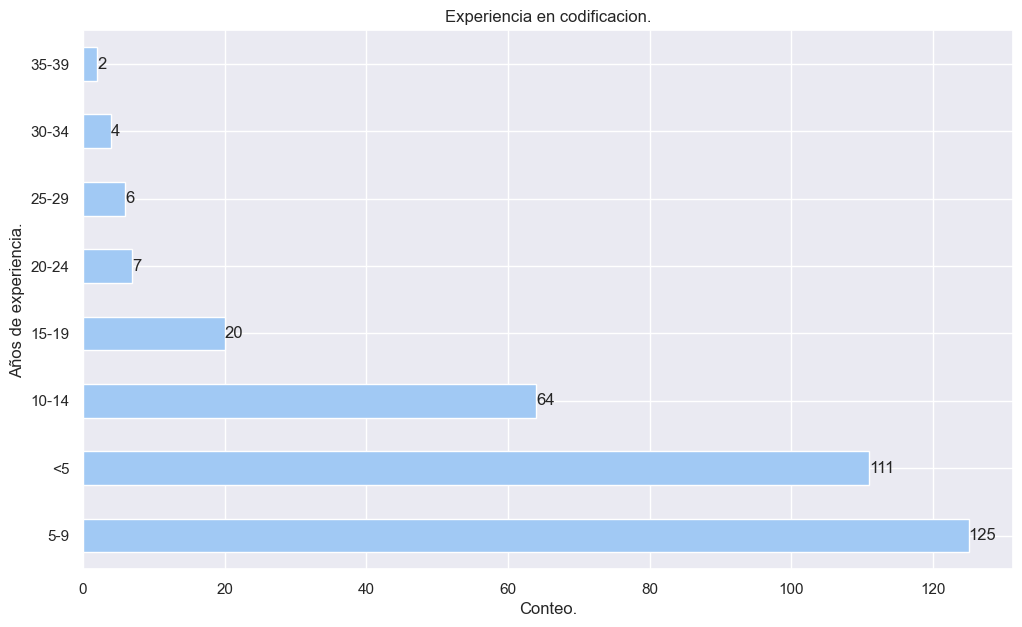

In [42]:
exp_df = df['exp_en_programacion'].value_counts()
exp_plot = exp_df.plot(
    kind='barh',
    title='Experiencia en codificacion.',
    ylabel='Años de experiencia.',
    xlabel='Conteo.')


# Plot annotations.
for k, v in enumerate(exp_df):
    exp_plot.annotate(v, (v, k), va="center")


In [61]:
exp_df = df['exp_en_programacion'].value_counts(normalize=True)
print(exp_df)

5-9      0.368732
<5       0.327434
10-14    0.188791
15-19    0.058997
20-24    0.020649
25-29    0.017699
30-34    0.011799
35-39    0.005900
Name: exp_en_programacion, dtype: float64


In [67]:
for k,v in enumerate(exp_df.keys()):
    print(f'Experiencia : {v} | {exp_df.values[k]*100} %')
    

Experiencia : 5-9 | 36.87315634218289 %
Experiencia : <5 | 32.743362831858406 %
Experiencia : 10-14 | 18.87905604719764 %
Experiencia : 15-19 | 5.899705014749262 %
Experiencia : 20-24 | 2.0648967551622417 %
Experiencia : 25-29 | 1.7699115044247788 %
Experiencia : 30-34 | 1.1799410029498525 %
Experiencia : 35-39 | 0.5899705014749262 %


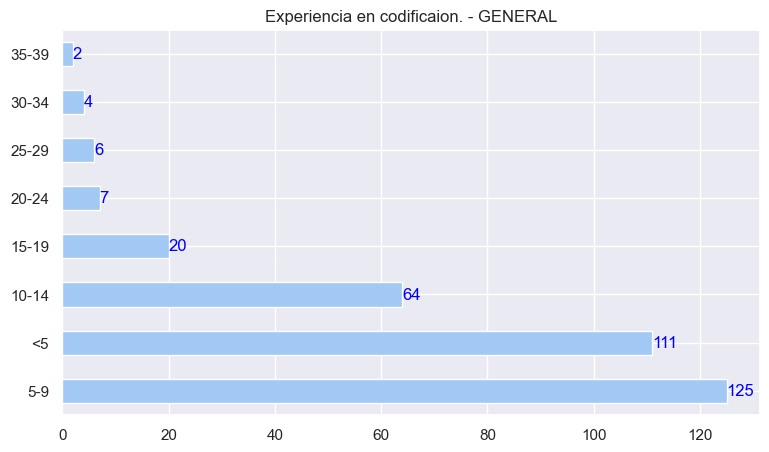

In [68]:
fig = plt.figure(figsize=(9, 5))


exp_coding = (
    df["exp_en_programacion"]
    .value_counts()
    .plot(kind="barh", title="Experiencia en codificaion. - GENERAL")
)


for k, v in enumerate(df["exp_en_programacion"].value_counts().values):
    exp_coding.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Experiencia en codificacion. - POR GENERO

#### EXPERIENCIA CODIFICANDO - HOMBRES

In [71]:
gen.get_group("HOMBRE")["exp_en_programacion"].value_counts()

5-9      97
<5       90
10-14    57
15-19    16
20-24     7
25-29     6
30-34     4
35-39     1
Name: exp_en_programacion, dtype: int64

In [72]:
gen.get_group("HOMBRE")["exp_en_programacion"].value_counts(normalize=True)

5-9      0.348921
<5       0.323741
10-14    0.205036
15-19    0.057554
20-24    0.025180
25-29    0.021583
30-34    0.014388
35-39    0.003597
Name: exp_en_programacion, dtype: float64

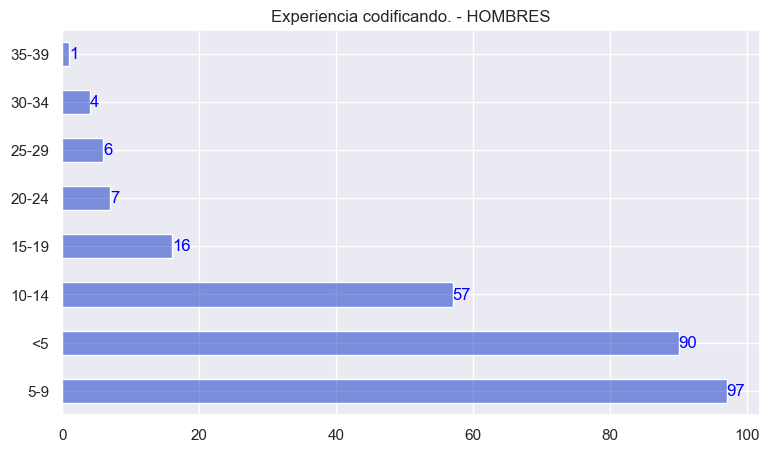

In [73]:
fig = plt.figure(figsize=(9, 5))

homb_exp_coding = (
    gen.get_group("HOMBRE")["exp_en_programacion"]
    .value_counts()
    .plot(
        kind="barh",
        title="Experiencia codificando. - HOMBRES",
        color=color_hombres_light,
    )
)


for k, v in enumerate(
    gen.get_group("HOMBRE")["exp_en_programacion"].value_counts().values
):
    homb_exp_coding.annotate(v, (v, k), va="center", color="blue")

plt.show()

### EXPERIENCIA CODIFICANDO - MUJERES

In [74]:
gen.get_group("MUJER")["exp_en_programacion"].value_counts()

5-9      23
<5       17
10-14     5
15-19     2
35-39     1
Name: exp_en_programacion, dtype: int64

In [75]:
gen.get_group("MUJER")["exp_en_programacion"].value_counts(normalize=True)

5-9      0.479167
<5       0.354167
10-14    0.104167
15-19    0.041667
35-39    0.020833
Name: exp_en_programacion, dtype: float64

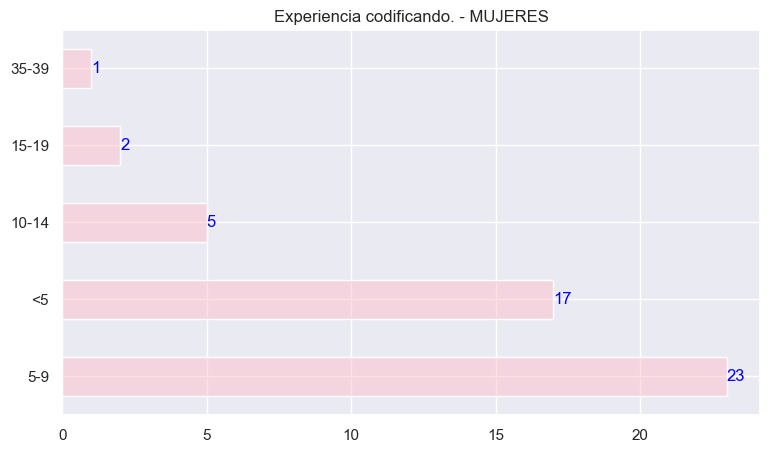

In [77]:
fig = plt.figure(figsize=(9, 5))

muj_exp_coding = (
    gen.get_group("MUJER")["exp_en_programacion"]
    .value_counts()
    .plot(
        kind="barh",
        title="Experiencia codificando. - MUJERES",
        color=color_mujeres_light,
    )
)


for k, v in enumerate(
    gen.get_group("MUJER")["exp_en_programacion"].value_counts().values
):
    muj_exp_coding.annotate(v, (v, k), va="center", color="blue")

plt.show()

### EXPERIENCIA CODIFICANDO - NO COMPARTO

In [78]:
gen.get_group("NO COMPARTO")["exp_en_programacion"].value_counts()

10-14    2
5-9      1
15-19    1
<5       1
Name: exp_en_programacion, dtype: int64

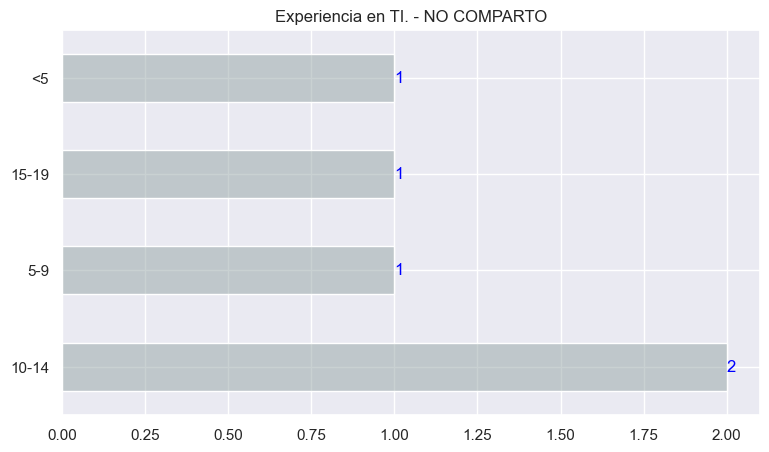

In [79]:
fig = plt.figure(figsize=(9, 5))


no_comp_exp_coding = (
    gen.get_group("NO COMPARTO")["exp_en_programacion"]
    .value_counts()
    .plot(
        kind="barh", title="Experiencia en TI. - NO COMPARTO", color=color_neutro_light
    )
)


for k, v in enumerate(
    gen.get_group("NO COMPARTO")["exp_en_programacion"].value_counts().values
):
    no_comp_exp_coding.annotate(v, (v, k), va="center", color="blue")

plt.show()

# Primera linea de codigo en maquina. - GENERAL

In [80]:
df["1_linea_de_codigo"].value_counts()

<10      101
10-11     55
14-15     51
12-13     37
16-17     31
18-19     27
20-21     16
>30        6
22-23      4
26-27      4
24-25      3
28-29      3
Name: 1_linea_de_codigo, dtype: int64

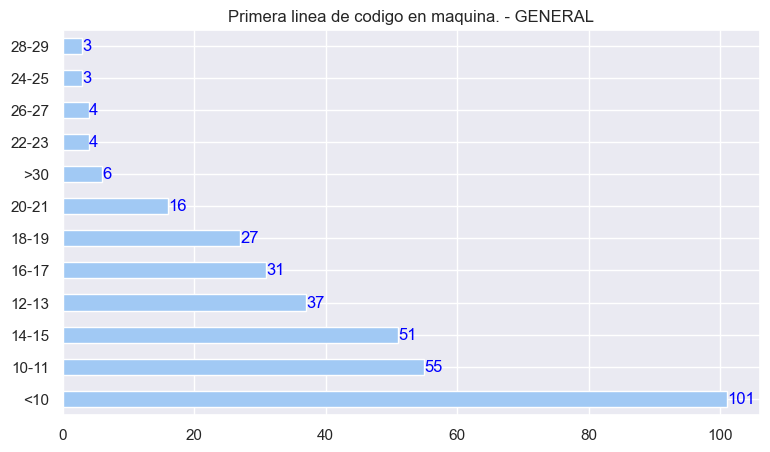

In [81]:
fig = plt.figure(figsize=(9, 5))

prim_linea_coding = (
    df["1_linea_de_codigo"]
    .value_counts()
    .plot(kind="barh", title="Primera linea de codigo en maquina. - GENERAL")
)


for k, v in enumerate(df["1_linea_de_codigo"].value_counts().values):
    prim_linea_coding.annotate(v, (v, k), va="center", color="blue")

plt.show()

# PRIMERA LINEA DE CODIGO EN MAQUINA - POR GENERO


### PRIMERA LINEA EN MAQUINA - SOLO HOMBRES

In [82]:
gen.get_group("HOMBRE")["1_linea_de_codigo"].value_counts()

<10      86
10-11    45
14-15    38
16-17    29
12-13    29
18-19    22
20-21    11
>30       5
26-27     4
24-25     3
22-23     3
28-29     2
Name: 1_linea_de_codigo, dtype: int64

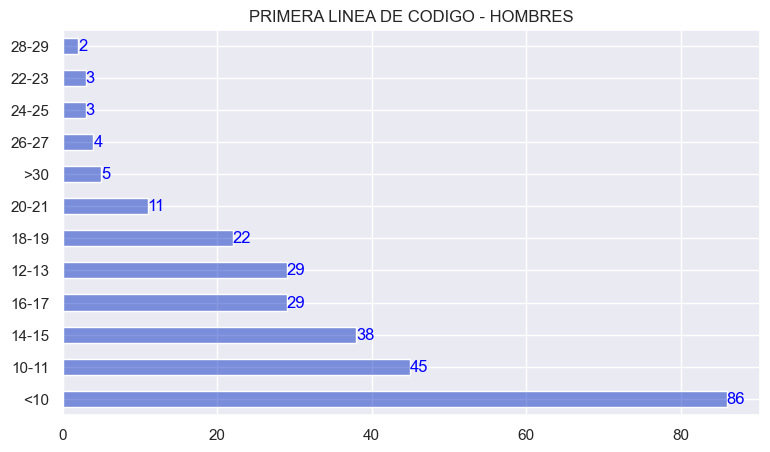

In [83]:
fig = plt.figure(figsize=(9, 5))

prim_linea_coding_hombres = (
    gen.get_group("HOMBRE")["1_linea_de_codigo"]
    .value_counts()
    .plot(
        kind="barh",
        title="PRIMERA LINEA DE CODIGO - HOMBRES",
        color=color_hombres_light,
    )
)

for k, v in enumerate(
    gen.get_group("HOMBRE")["1_linea_de_codigo"].value_counts().values
):
    prim_linea_coding_hombres.annotate(v, (v, k), va="center", color="blue")

plt.show()

### PRIMERA LINEA EN MAQUINA - MUJERES

In [84]:
gen.get_group("MUJER")["1_linea_de_codigo"].value_counts()

<10      13
14-15    12
12-13     7
10-11     6
18-19     4
20-21     2
16-17     1
28-29     1
>30       1
Name: 1_linea_de_codigo, dtype: int64

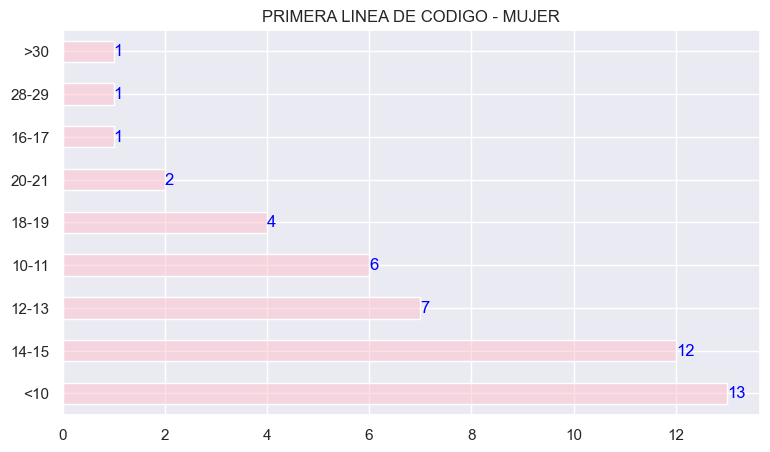

In [85]:
fig = plt.figure(figsize=(9, 5))

prim_linea_coding_mujeres = (
    gen.get_group("MUJER")["1_linea_de_codigo"]
    .value_counts()
    .plot(
        kind="barh", title="PRIMERA LINEA DE CODIGO - MUJER", color=color_mujeres_light
    )
)

for k, v in enumerate(
    gen.get_group("MUJER")["1_linea_de_codigo"].value_counts().values
):
    prim_linea_coding_mujeres.annotate(v, (v, k), va="center", color="blue")

plt.show()

# PRIMERA LINEA EN MAQUINA - NO DEFINIDO

In [86]:
gen.get_group("NO COMPARTO")["1_linea_de_codigo"].value_counts()

10-11    2
22-23    1
18-19    1
14-15    1
20-21    1
Name: 1_linea_de_codigo, dtype: int64

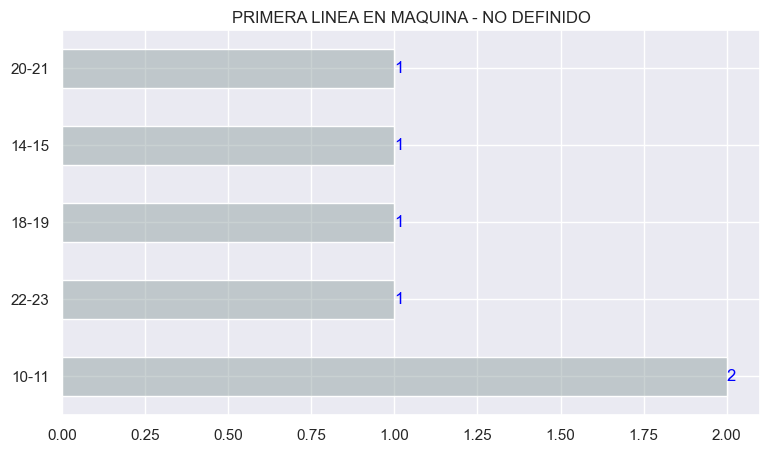

In [87]:
fig = plt.figure(figsize=(9, 5))

prim_linea_cod_no_comp = (
    gen.get_group("NO COMPARTO")["1_linea_de_codigo"]
    .value_counts()
    .plot(
        kind="barh",
        title="PRIMERA LINEA EN MAQUINA - NO DEFINIDO",
        color=color_neutro_light,
    )
)


for k, v in enumerate(
    gen.get_group("NO COMPARTO")["1_linea_de_codigo"].value_counts().values
):
    prim_linea_cod_no_comp.annotate(v, (v, k), va="center", color="blue")

plt.show()

# GENERAL

### EXPERIENCIA VS MODALIDAD

- Se pretende explorar el tipo de trabajo que realizan segun la experiencia en TI.

In [91]:
exp = df.groupby("exp_en_IT")

In [92]:
exp_cats = [i for i in exp.groups.keys()]

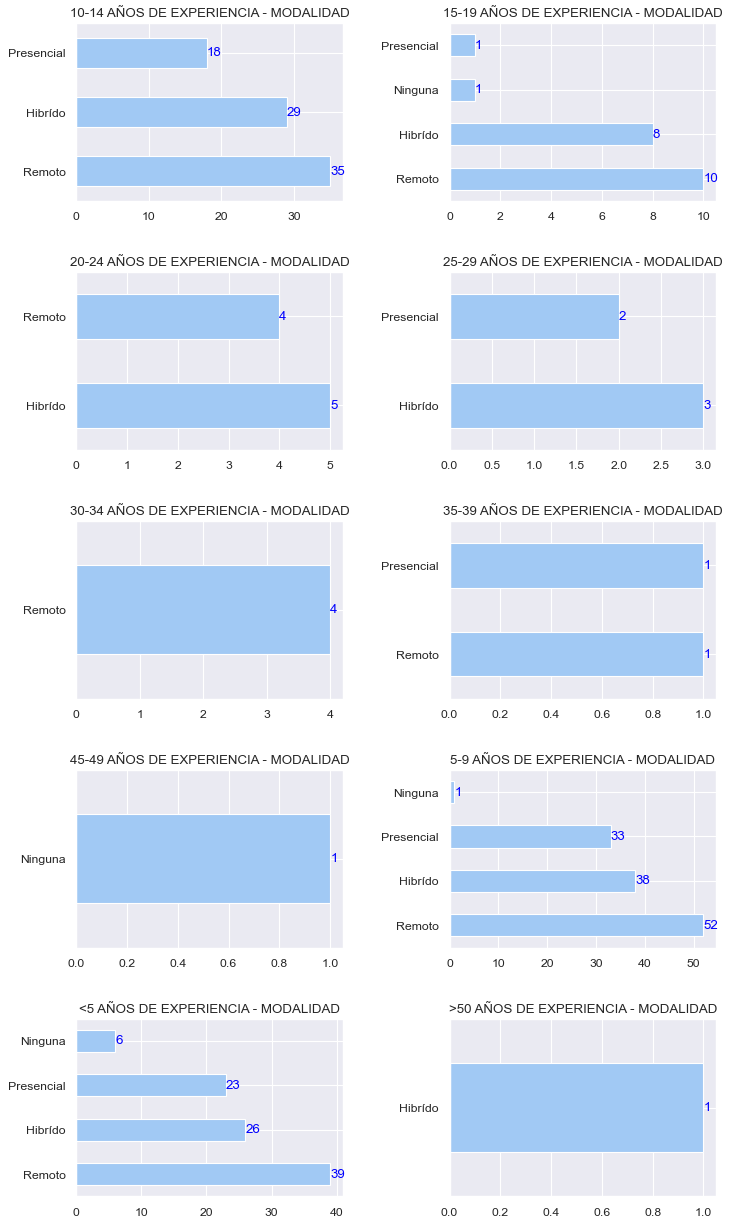

In [115]:
plt.figure(figsize=(10, 30), dpi=80)


for k, v in enumerate(exp_cats):
    plt.subplot(8, 2, k + 1)
    mod = (
        exp.get_group(v)["modalidad"]
        .value_counts()
        .plot(
            kind="barh",
            ylabel='',
            #autopct='%1.1f%%',
            title="{0} AÑOS DE EXPERIENCIA - MODALIDAD".format(
                v),
        )
    )
    for l, m in enumerate(exp.get_group(v)["modalidad"].value_counts().values):
        mod.annotate(m, (m, l), va="center", color="blue")


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [118]:

for k, v in enumerate(exp_cats):
    d = exp.get_group(v)["modalidad"].value_counts(normalize=True)
    print('_'*34)
    print(f'Años de experiencia:{v}')
    print('_'*34)
    print(d)
    print('\n'*3)


__________________________________
Años de experiencia:10-14
__________________________________
Remoto        0.426829
Hibrído       0.353659
Presencial    0.219512
Name: modalidad, dtype: float64




__________________________________
Años de experiencia:15-19
__________________________________
Remoto        0.50
Hibrído       0.40
Ninguna       0.05
Presencial    0.05
Name: modalidad, dtype: float64




__________________________________
Años de experiencia:20-24
__________________________________
Hibrído    0.555556
Remoto     0.444444
Name: modalidad, dtype: float64




__________________________________
Años de experiencia:25-29
__________________________________
Hibrído       0.6
Presencial    0.4
Name: modalidad, dtype: float64




__________________________________
Años de experiencia:30-34
__________________________________
Remoto    1.0
Name: modalidad, dtype: float64




__________________________________
Años de experiencia:35-39
__________________________________
Remoto   

### EXPERIENCIA EN TI  VS IMPORTANCIA DE LA EDUCACION FORMAL
    - Postura sobre la "importancia de la educacion formal" de los que respondieron la
    encuesta segun los años de experiencia en TI.

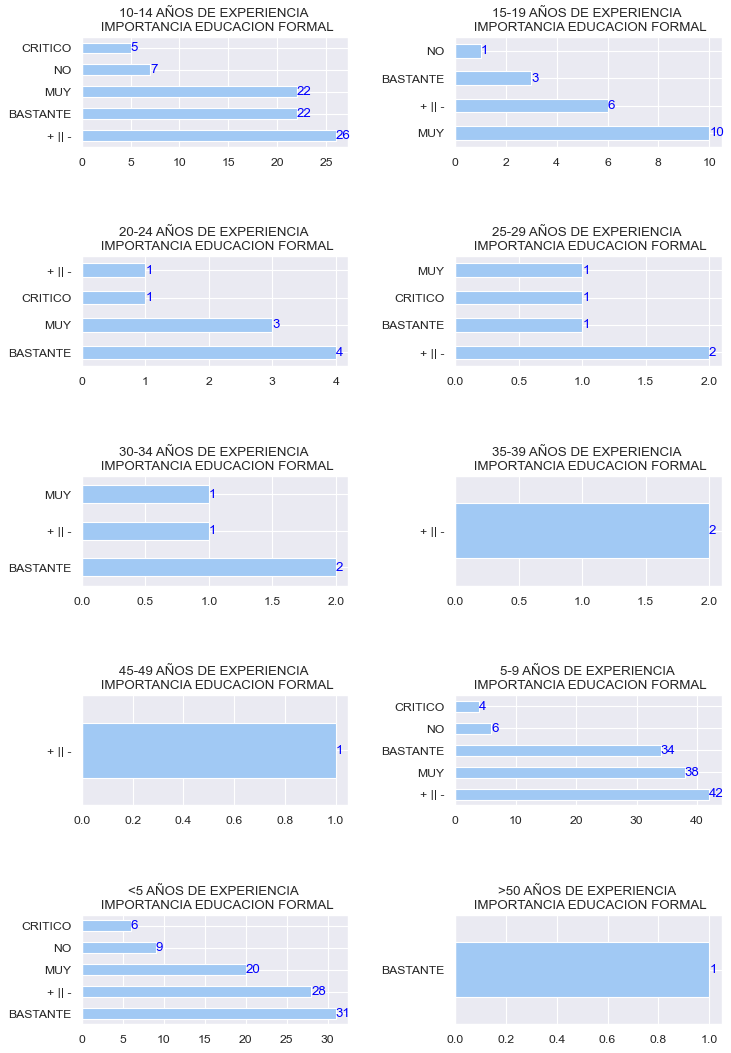

In [135]:
plt.figure(figsize=(10, 60), dpi=80)


for k, v in enumerate(exp_cats):
    plt.subplot(18, 2, k + 1)
    imp = (
        exp.get_group(v)["imp_ed_formal"]
        .value_counts()
        .plot(
            kind="barh",
            title="{0} AÑOS DE EXPERIENCIA \n IMPORTANCIA EDUCACION FORMAL".format(
                v
            ),
        )
    )

    for l, m in enumerate(exp.get_group(v)["imp_ed_formal"].value_counts().values):
        imp.annotate(m, (m, l), va="center", color="blue")


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

### EXPERIENCIA EN TI VS LENGUAJE FAVORITO
  - Se explora la relacion entre los años de experiencia en TI vs el lenguaje favorito.

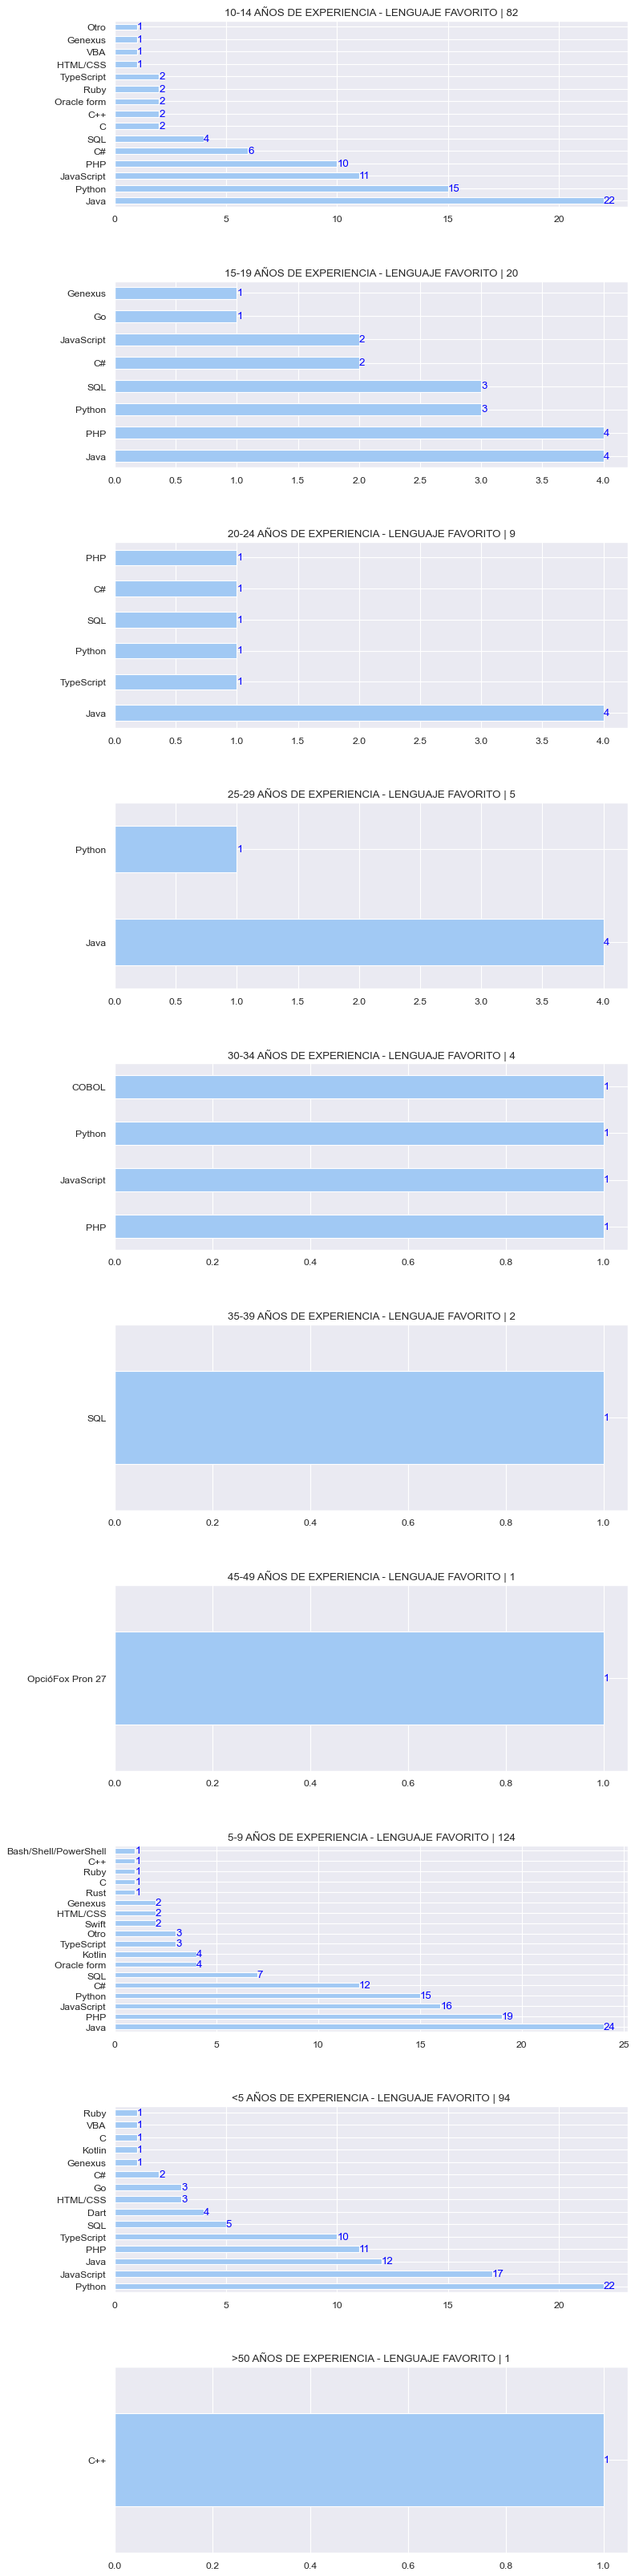

In [140]:
plt.figure(figsize=(10, 90), dpi=80)


for k, v in enumerate(exp_cats):
    plt.subplot(18, 1, k + 1)
    leng = (
        exp.get_group(v)["leng_fav"]
        .value_counts()
        .plot(
            kind="barh",
            title="{0} AÑOS DE EXPERIENCIA - LENGUAJE FAVORITO | {1}".format(
                v, exp.get_group(v)["leng_fav"].shape[0]
            ),
        )
    )

    for l, m in enumerate(exp.get_group(v)["leng_fav"].value_counts().values):
        leng.annotate(m, (m, l), va="center", color="blue")


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### EXPERIENCIA EN TI VS LENGUAJE MAS ODIADO
  - Se explora la relacion entre los años de experiencia en TI vs el lenguaje mas odiado.

In [141]:
exp.get_group("35-39")["leng_mas_odiado"].value_counts()

Series([], Name: leng_mas_odiado, dtype: int64)

In [142]:
exp.get_group("35-39")["leng_mas_odiado"]

20     NaN
271    NaN
Name: leng_mas_odiado, dtype: object

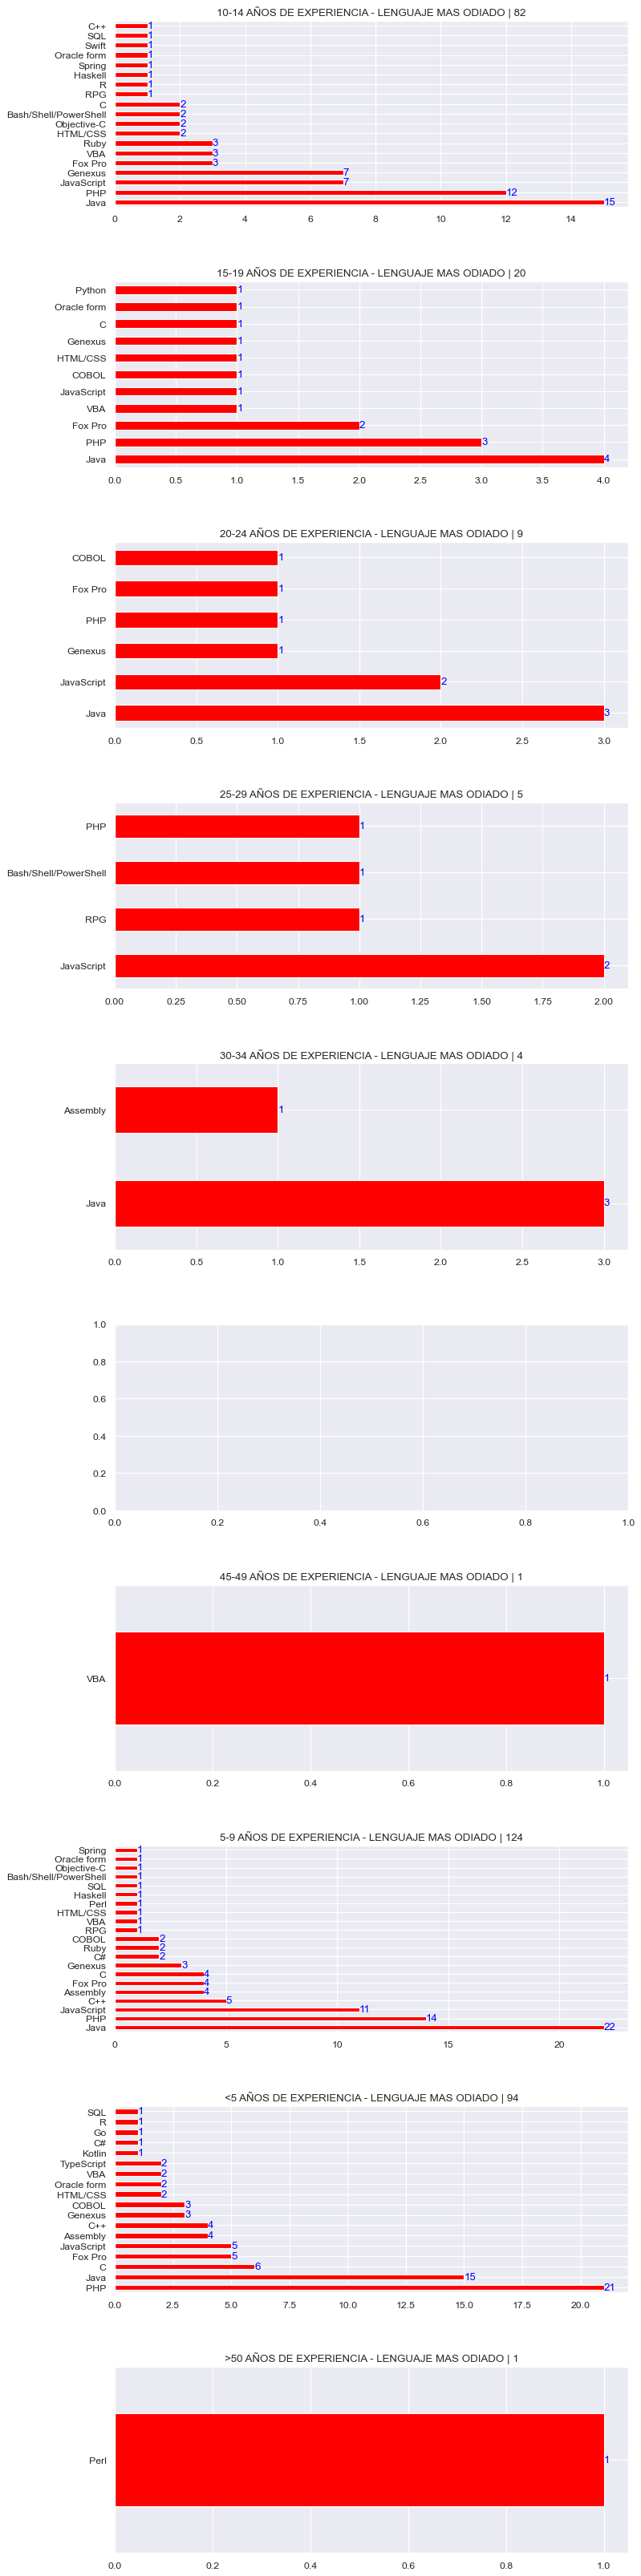

In [143]:
plt.figure(figsize=(10, 90), dpi=80)


for k, v in enumerate(exp_cats):
    plt.subplot(18, 1, k + 1)
    if len(exp.get_group(v)["leng_mas_odiado"].value_counts()) > 0:
        hated_lang = (
            exp.get_group(v)["leng_mas_odiado"]
            .value_counts()
            .plot(
                kind="barh",
                color="red",
                title="{0} AÑOS DE EXPERIENCIA - LENGUAJE MAS ODIADO | {1}".format(
                    v, exp.get_group(v)["leng_mas_odiado"].shape[0]
                ),
            )
        )
        for l, m in enumerate(
            exp.get_group(v)["leng_mas_odiado"].value_counts().values
        ):
            hated_lang.annotate(m, (m, l), va="center", color="blue")


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### EXPERIENCIA EN TI VS ORIGEN DEL TRABAJO
  - Se explora la experiencia en TI vs el origen del trabajo que realiza el encuestado.

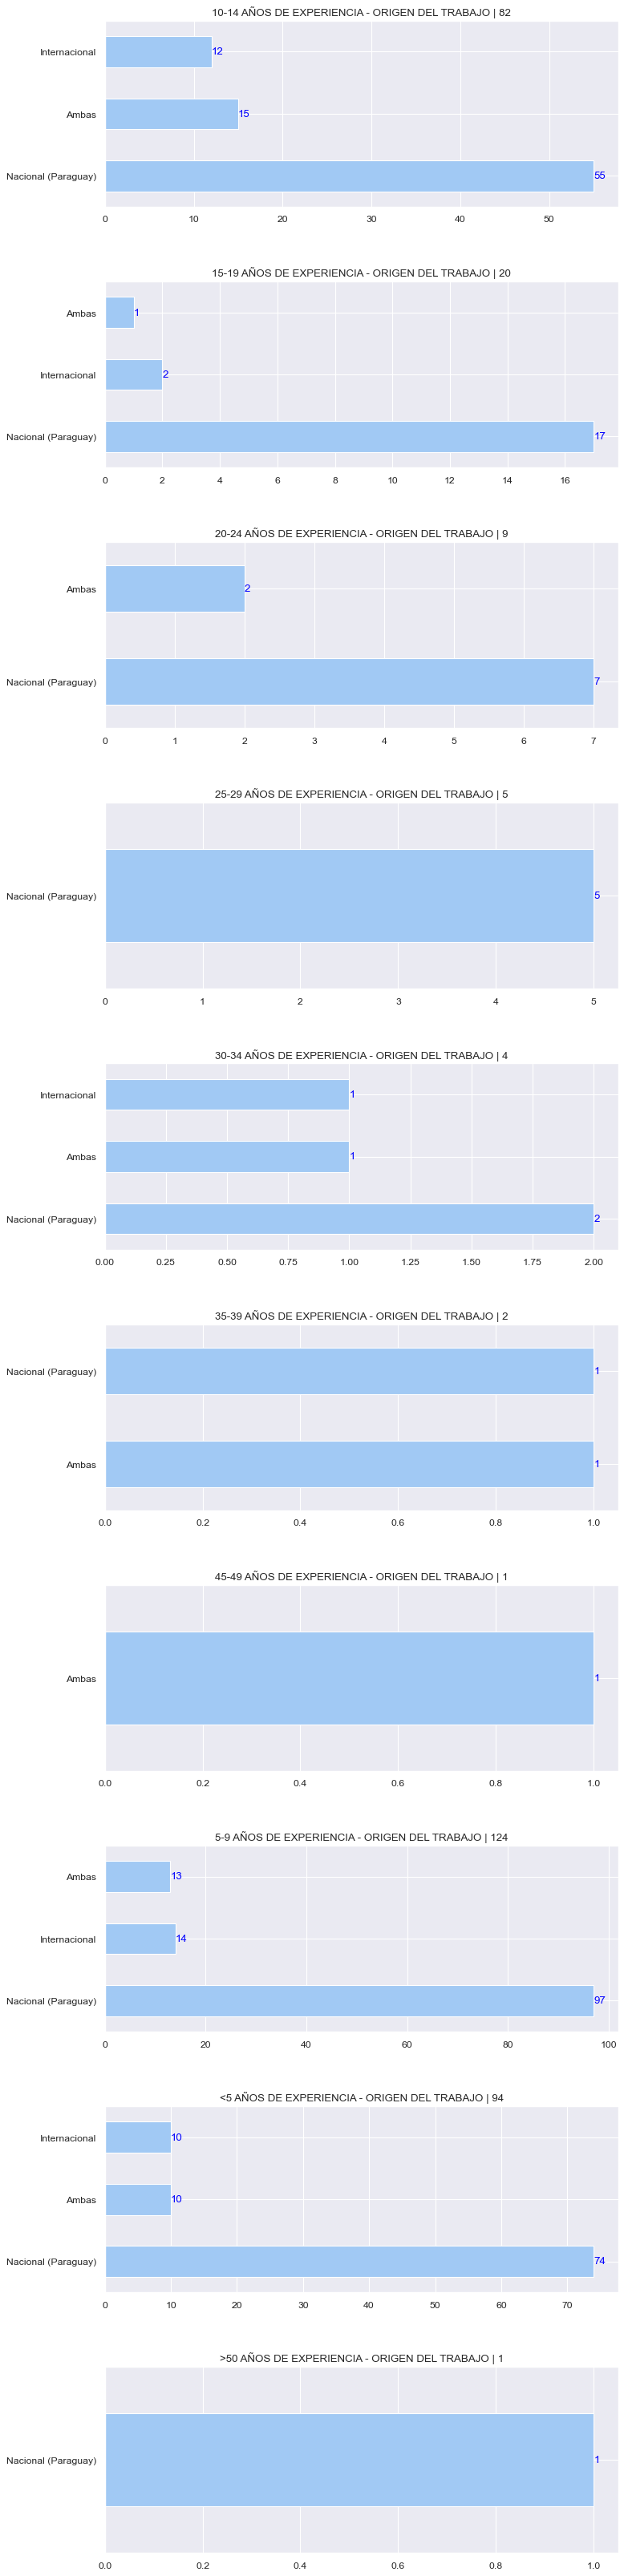

In [144]:
plt.figure(figsize=(10, 90), dpi=80)


for k, v in enumerate(exp_cats):
    plt.subplot(18, 1, k + 1)
    if len(exp.get_group(v)["trabajo"].value_counts()) != 0:
        trab_exp = (
            exp.get_group(v)["trabajo"]
            .value_counts()
            .plot(
                kind="barh",
                title="{0} AÑOS DE EXPERIENCIA - ORIGEN DEL TRABAJO | {1}".format(
                    v, exp.get_group(v)["trabajo"].shape[0]
                ),
            )
        )
        for l, m in enumerate(exp.get_group(v)["trabajo"].value_counts().values):
            trab_exp.annotate(m, (m, l), va="center", color="blue")


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### EXPERIENCIA EN TI VS TIPO DE TRABAJO
  - Se explora la experiencia en TI vs el tipo de trabajo que realizan los encuestados.

In [127]:
tt = get_column_uniques(df, "tipo_de_trabajo")

In [128]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [129]:
for i in tt:
    d = df[df["tipo_de_trabajo"].str.contains(i)]
    print("Tipo de trabajo. -> ", i)
    print("=" * 35)
    print(d["exp_en_IT"].value_counts())
    print("=" * 29)
    print("\n" * 3)

Tipo de trabajo. ->  Dev de videojuegos
10-14    2
5-9      1
<5       1
Name: exp_en_IT, dtype: int64




Tipo de trabajo. ->  Dev back-end
5-9      46
10-14    39
<5       32
15-19     7
20-24     4
25-29     4
30-34     2
35-39     1
45-49     1
Name: exp_en_IT, dtype: int64




Tipo de trabajo. ->  Project Lead
10-14    25
5-9      16
20-24     7
15-19     5
25-29     5
35-39     1
<5        1
45-49     1
30-34     1
Name: exp_en_IT, dtype: int64




Tipo de trabajo. ->  Dev full-stack
5-9      56
10-14    45
<5       37
15-19    11
20-24     5
25-29     5
35-39     1
30-34     1
45-49     1
Name: exp_en_IT, dtype: int64




Tipo de trabajo. ->  Dev front-end
5-9      34
<5       31
10-14    23
25-29     4
15-19     4
20-24     3
35-39     1
30-34     1
45-49     1
Name: exp_en_IT, dtype: int64




Tipo de trabajo. ->  Dev de sist. embebidos
5-9      7
10-14    5
20-24    2
35-39    2
<5       2
15-19    2
>50      1
25-29    1
45-49    1
30-34    1
Name: exp_en_IT, dtype: int64




### PRIMERA LINEA DE CODIGO VS OCUPACION

In [130]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [131]:
carers = df.groupby("carr_especialidades")

In [132]:
carreras = df["carr_especialidades"].value_counts().keys()

In [133]:
len(carreras)

32

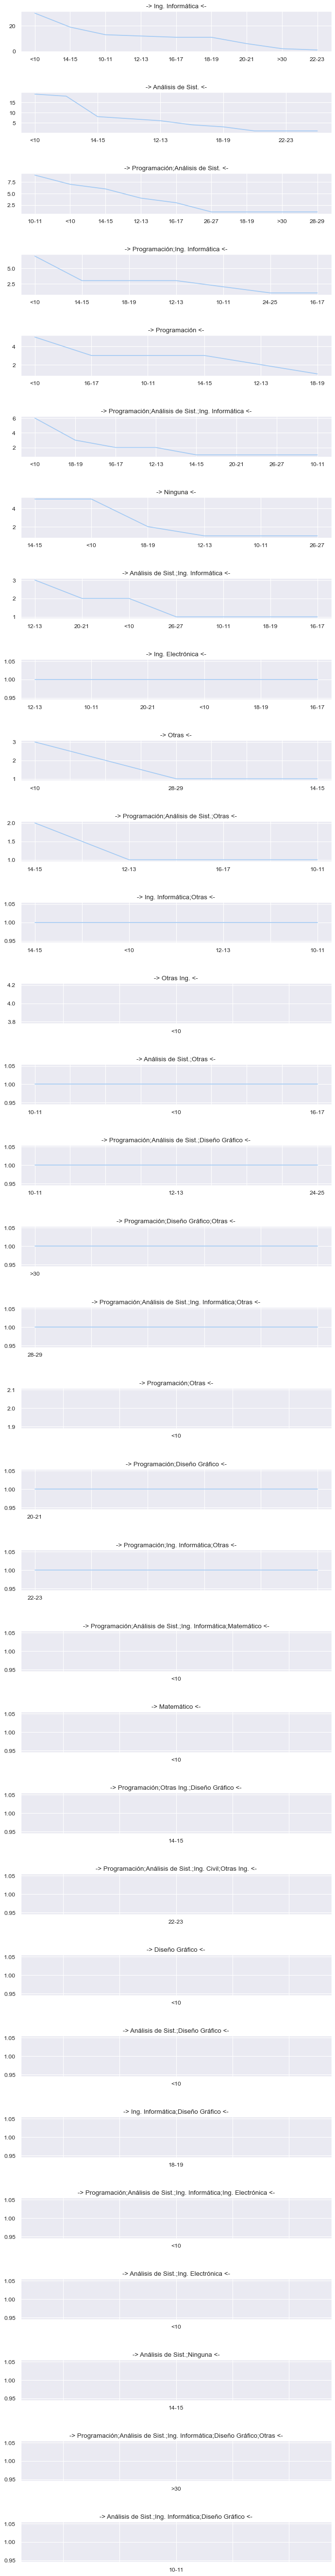

In [134]:
plt.figure(figsize=(10, 90), dpi=80)


for k, v in enumerate(carreras):
    plt.subplot(35, 1, k + 1)
    carers.get_group(v)["1_linea_de_codigo"].value_counts().plot(
        title=f"-> {v} <-",
    )


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Genero vs. 1 linea de codigo.

In [135]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [136]:
df["1_linea_de_codigo"].fillna("", inplace=True)
df["genero"].fillna("Q", inplace=True)

In [137]:
gen_linea_cod_groups = df.groupby(["genero", "1_linea_de_codigo"])

In [138]:
print(len(gen_linea_cod_groups.groups.keys()))

33


In [139]:
for i in gen_linea_cod_groups.groups.keys():
    g = gen_linea_cod_groups.get_group(i)
    print("Primera linea de codigo vs experiencia en IT. ------------> ", i)
    print(g["exp_en_IT"].value_counts())
    print("\n" * 3)

Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE', '')
5-9      1
10-14    1
Name: exp_en_IT, dtype: int64




Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE', '10-11')
5-9      18
10-14    15
<5       11
20-24     1
Name: exp_en_IT, dtype: int64




Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE', '12-13')
10-14    12
5-9      11
<5        5
20-24     1
Name: exp_en_IT, dtype: int64




Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE', '14-15')
10-14    15
5-9      13
15-19     7
<5        3
Name: exp_en_IT, dtype: int64




Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE', '16-17')
5-9      11
10-14     9
<5        4
15-19     3
>50       1
20-24     1
Name: exp_en_IT, dtype: int64




Primera linea de codigo vs experiencia en IT. ------------>  ('HOMBRE', '18-19')
5-9      10
10-14     9
<5        3
Name: exp_en_IT, dtype: int64




Primera linea de codigo vs experiencia en